In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import operator
import seaborn as sns
import json
import matplotlib.pyplot as plt

In [3]:
def load_json_to_df(datapass):
    data = [] 
    with open(datapass) as data_file: 
        for f in data_file:
            data.append(json.loads(f))
    df = pd.DataFrame(data)
    return df

In [5]:
business = load_json_to_df("business.json")

In [6]:
review = load_json_to_df("review.json")

In [7]:
user = load_json_to_df("user.json")

In [8]:
business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC


In [9]:
review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA


In [10]:
user.head(2)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,...,16856,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",209,"[M19NwFwAXKRZzt8koF11hQ, QRcMZ8pJJBBZaKubHOoMD...",16605,Cin,272,17019,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,...,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18


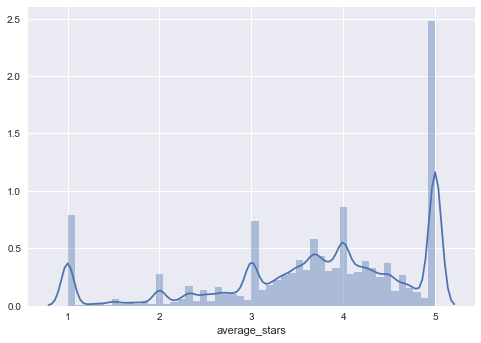

In [12]:
sns.distplot(user["average_stars"])

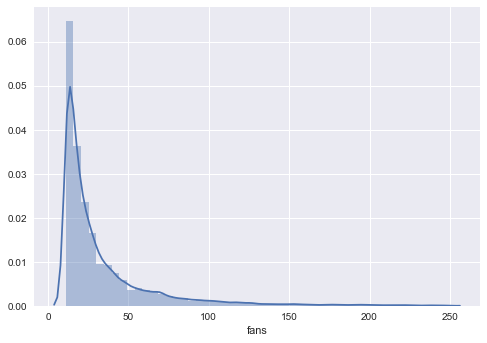

In [19]:
user_10 = user.loc[user['fans']>10]
user_10_250 = user_10.loc[user_10['fans']<250]
sns.distplot(user_10_250["fans"])

In [26]:
user_1 = user.loc[user["average_stars"]<1.5]
user_1_4 = user_1[user["average_stars"] > 4.5]
user_filtered = user_1_4["user_id"]

/Users/xuwenshen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [29]:
# Review posted by users who always give positive or 
#negative reviews
review_1_5_user = review.loc[review["user_id"].isin(user_filtered)]

In [30]:
# filter all the restaurants
is_rest = []
for i in business['categories']:
    
    if 'Restaurants' in i or 'Food' in i:
        is_rest.append(True)
    else:
        is_rest.append(False)
restaurants = business.loc[is_rest]

In [32]:
# reviews for only restaurants
rest_id = restaurants['business_id']
rest_review = review.loc[review['business_id'].isin(rest_id)]

In [34]:
# Restaurant with most reviews
rest_top1review = restaurants.sort_values(by ='review_count', ascending=False)
rest_top1review[:2]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
103325,3655 Las Vegas Blvd S,"{'Alcohol': 'full_bar', 'HasTV': False, 'Noise...",4JNXUYY8wbaaDmk3BPzlWw,"[French, Steakhouses, Breakfast & Brunch, Rest...",Las Vegas,"{'Monday': '7:00-23:00', 'Tuesday': '7:00-23:0...",1,36.112827,-115.172581,Mon Ami Gabi,The Strip,89109,6979,4.0,NV
125404,3570 S Las Vegas Blvd,"{'RestaurantsTableService': True, 'GoodForMeal...",RESDUcs7fIiihp38-d6_6g,"[Food, Restaurants, Buffets, Breakfast & Brunc...",Las Vegas,"{'Monday': '7:30-22:00', 'Tuesday': '7:30-22:0...",1,36.116113,-115.176222,Bacchanal Buffet,The Strip,89109,6417,4.0,NV


In [39]:
top1_res_review = rest_review.loc[rest_review['business_id']=="4JNXUYY8wbaaDmk3BPzlWw"].head(2)

In [42]:
# reviews with extreme low rating
top1_res_review_1star = top1_res_review.loc[top1_res_review["stars"]<=1]

In [44]:
# reviews with extreme high rating
top1_res_review_1star = top1_res_review.loc[top1_res_review["stars"]>=4.5]
top1_res_review_1star.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
1366372,4JNXUYY8wbaaDmk3BPzlWw,0,2011-02-22,0,WE9eUYf5EV8AxJjl8QZRtA,5,"Very chic. Although, the menu items doesnt SCR...",0,K6FpHYwcJYznoXXu8ySZHw


In [48]:
top1_res_review_1star_text = top1_res_review_1star['text']
documents = top1_res_review_1star_text.tolist()

In [63]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [64]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 100

# # Run NMF
# nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# # Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [65]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 100

In [66]:
# LDA topic
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
choice smoked alright absolutely cream casual cuisine doesnt salmon enjoy proper shreds view sun plate super bellagio noon satisfied chic uncle platter need business just bagel outside service actually hurts water sat capers ordered scream brainwashed places items awesome relax caught gallop sunglasses place looks right simple fountain foods like pile simply love delish high american enjoyed plain shows food come pricing french mind menu didnt cheese
Topic 1:
shreds places enjoyed awesome cream plain alright choice pricing gallop satisfied foods items business proper cheese menu bellagio pile smoked water capers high scream actually salmon outside sunglasses caught sun noon relax simple come sat cuisine place platter looks plate shows american doesnt simply uncle enjoy view brainwashed delish like right bagel just chic service fountain hurts casual absolutely need didnt food ordered love super french mind
Topic 2:
like fountain doesnt gallop hurts bellagio brainwashed plate sm

In [68]:
# Import svd
from sklearn.decomposition import TruncatedSVD

no_topics = 20


sa = TruncatedSVD(n_components=60, n_iter=20).fit(tf)

In [69]:
# print SVD topics
display_topics(sa, tf_feature_names, no_top_words)

Topic 0:
like looks salmon capers foods love absolutely simply simple gallop french fountain super food enjoyed enjoy doesnt didnt delish cuisine cream come choice chic cheese caught casual uncle business brainwashed bellagio bagel awesome american alright actually high hurts items plate shreds shows service scream satisfied sat smoked right relax proper pricing platter plain just places place pile outside ordered noon need mind menu sun view sunglasses water


In [53]:
# doc = token_nize_part_speach(documents)
# doc[:10]

In [54]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000
def vectorize(inp):
    count_vectorizer = CountVectorizer(max_df=0.95, max_features=no_features, stop_words=stop_words)
    cvec = count_vectorizer.fit_transform(inp)
    count_feature_names = count_vectorizer.get_feature_names()
    return cvec, count_feature_names

In [55]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [56]:
from sklearn.decomposition import LatentDirichletAllocation
no_topics = 40
no_top_words = 20
def run_lda(cvec, count_feature_names):
    lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(cvec)
    display_topics(lda, count_feature_names, no_top_words)
    return lda

In [58]:
original_doc_vec = vectorize(documents)
part_speech_vec = vectorize(doc)
hype_vec = vectorize(hypered)
ori = run_lda(original_doc_vec[0], original_doc_vec[1])

NameError: name 'stop_words' is not defined